In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csecicids2018-cleaned/cleaned_ids2018_sampled.csv


# Reading the dataset

In [2]:
# read the data
df_dataset = pd.read_csv("/kaggle/input/csecicids2018-cleaned/cleaned_ids2018_sampled.csv")

# Displaying the data

In [3]:
df_dataset

,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,146275,3389,6,5206015,9,11,1213,1948,661,0,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1,512109,443,6,60991608,14,14,1211,3396,875,0,...,20,116504.666667,117401.762867,356150,68519,1.000239e+07,1.665183e+04,10009249,9968397,1
2,807703,53,17,27292,1,1,45,163,45,45,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
3,491912,443,6,70343424,17,20,1118,5653,258,0,...,20,527683.500000,386311.526445,800847,254520,3.457024e+07,3.406089e+07,58654921,10485549,1
4,858679,53,17,137267,2,2,94,214,47,47,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252841,940974,64678,6,1397,5,2,935,267,935,0,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1252842,45433,51274,6,1,3,0,77,0,46,0,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1252843,912254,80,6,233,2,0,0,0,0,0,...,20,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1
1252844,990683,53,17,23818,1,1,34,204,34,34,...,8,0.000000,0.000000,0,0,0.000000e+00,0.000000e+00,0,0,1


In [4]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252846 entries, 0 to 1252845
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1252846 non-null  int64  
 1   Dst Port           1252846 non-null  int64  
 2   Protocol           1252846 non-null  int64  
 3   Flow Duration      1252846 non-null  int64  
 4   Tot Fwd Pkts       1252846 non-null  int64  
 5   Tot Bwd Pkts       1252846 non-null  int64  
 6   TotLen Fwd Pkts    1252846 non-null  int64  
 7   TotLen Bwd Pkts    1252846 non-null  int64  
 8   Fwd Pkt Len Max    1252846 non-null  int64  
 9   Fwd Pkt Len Min    1252846 non-null  int64  
 10  Fwd Pkt Len Mean   1252846 non-null  float64
 11  Fwd Pkt Len Std    1252846 non-null  float64
 12  Bwd Pkt Len Max    1252846 non-null  int64  
 13  Bwd Pkt Len Min    1252846 non-null  int64  
 14  Bwd Pkt Len Mean   1252846 non-null  float64
 15  Bwd Pkt Len Std    1252846 non-n

# Taking care of missing data, Removing duplicates

In [5]:
# replace +ve and -ve infinity with NaN
df_dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
# drop missing values
df_dataset.dropna(inplace=True)

In [7]:
print(df_dataset.duplicated().sum())

117437


In [8]:
df_dataset.drop_duplicates(inplace = True)

In [9]:
print(df_dataset.duplicated().sum())

0


# Implementing binary classification

In [10]:
df_dataset["Label"].value_counts()

1     880060
4     124280
5      52051
2      35127
3      33817
6       7598
7       2028
8        301
9         91
10        46
11        10
Name: Label, dtype: int64

In [11]:
old_value = 1
new_value = 0
df_dataset['Label'] = df_dataset['Label'].replace(old_value, new_value)

In [12]:
for i in range(2, 12):
    old_value = i
    new_value = 1
    df_dataset['Label'] = df_dataset['Label'].replace(old_value, new_value)

In [13]:
df_dataset["Label"].value_counts()

0    880060
1    255349
Name: Label, dtype: int64

# Balancing the data (Undersampling)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight

RANDOM_STATE_SEED = 12

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df = df_dataset
fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df["Label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
df1 = df[df["Label"] == 0][:255349]
df2 = df[df["Label"] == 1][:255349]
df_equal = pd.concat([ df1,df2], axis =0)

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [17]:
fig = go.Figure(data=[
    go.Bar(name='Benign', 
           y=df_equal["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df_equal["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious', 
           y=df_equal["Label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df_equal["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

# Creating train/test split

In [18]:
train, test = train_test_split(df_equal, test_size=0.2)

In [19]:
# display columns
train.columns

Index(['Unnamed: 0', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Pkt Size Avg', 'Fwd Seg Size Avg',
  

In [20]:
# feature info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408558 entries, 625218 to 188878
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         408558 non-null  int64  
 1   Dst Port           408558 non-null  int64  
 2   Protocol           408558 non-null  int64  
 3   Flow Duration      408558 non-null  int64  
 4   Tot Fwd Pkts       408558 non-null  int64  
 5   Tot Bwd Pkts       408558 non-null  int64  
 6   TotLen Fwd Pkts    408558 non-null  int64  
 7   TotLen Bwd Pkts    408558 non-null  int64  
 8   Fwd Pkt Len Max    408558 non-null  int64  
 9   Fwd Pkt Len Min    408558 non-null  int64  
 10  Fwd Pkt Len Mean   408558 non-null  float64
 11  Fwd Pkt Len Std    408558 non-null  float64
 12  Bwd Pkt Len Max    408558 non-null  int64  
 13  Bwd Pkt Len Min    408558 non-null  int64  
 14  Bwd Pkt Len Mean   408558 non-null  float64
 15  Bwd Pkt Len Std    408558 non-null  float64
 1

# Feature scaling

In [21]:
min_max_scaler = MinMaxScaler().fit(train[['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']])

In [22]:
numerical_columns = ['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [23]:
train[numerical_columns] = min_max_scaler.transform(train[numerical_columns])

In [24]:
train

,Unnamed: 0,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
625218,77892,8080,6,0.000004,0.503273,0.539847,0.000000,0.000000,0.000000,0.0,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1
332506,138648,445,6,0.002345,0.503289,0.539864,0.000000,0.000000,0.000000,0.0,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
193782,637114,3389,6,0.019377,0.503366,0.539985,0.000129,0.000032,0.014890,0.0,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
7294,80604,3389,6,0.032377,0.503443,0.539985,0.000165,0.000035,0.016332,0.0,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
59431,692110,443,6,0.000004,0.503289,0.539847,0.000009,0.000000,0.001036,0.0,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220901,785822,80,6,0.000012,0.503273,0.539847,0.000000,0.000000,0.000000,0.0,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1
152029,457760,445,6,0.004850,0.503351,0.539934,0.000042,0.000012,0.002320,0.0,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
106734,237762,38561,6,0.717177,0.503273,0.539847,0.000000,0.000000,0.000000,0.0,...,0.454545,0.0,0.0,0.0,0.0,0.717177,0.0,0.717177,0.717177,0
154737,591147,80,6,0.000008,0.503289,0.539916,0.000018,0.000010,0.003627,0.0,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0


In [25]:
train.drop(['Unnamed: 0'], axis=1,inplace=True)
test.drop(['Unnamed: 0'],axis=1,inplace=True)

In [26]:
train

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
625218,8080,6,0.000004,0.503273,0.539847,0.000000,0.000000,0.000000,0.0,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1
332506,445,6,0.002345,0.503289,0.539864,0.000000,0.000000,0.000000,0.0,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
193782,3389,6,0.019377,0.503366,0.539985,0.000129,0.000032,0.014890,0.0,0.023868,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
7294,3389,6,0.032377,0.503443,0.539985,0.000165,0.000035,0.016332,0.0,0.018763,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
59431,443,6,0.000004,0.503289,0.539847,0.000009,0.000000,0.001036,0.0,0.004345,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220901,80,6,0.000012,0.503273,0.539847,0.000000,0.000000,0.000000,0.0,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1
152029,445,6,0.004850,0.503351,0.539934,0.000042,0.000012,0.002320,0.0,0.008802,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0
106734,38561,6,0.717177,0.503273,0.539847,0.000000,0.000000,0.000000,0.0,0.000000,...,0.454545,0.0,0.0,0.0,0.0,0.717177,0.0,0.717177,0.717177,0
154737,80,6,0.000008,0.503289,0.539916,0.000018,0.000010,0.003627,0.0,0.009084,...,0.454545,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0


In [27]:
test[numerical_columns] = min_max_scaler.transform(test[numerical_columns])

# Counting number of records in each split

In [28]:
print("Full dataset:\n")
print("Benign: " + str(df_equal["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_equal["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))

Full dataset:

Benign: 255349
Malicious: 255349
---------------
Training set:

Benign: 204057
Malicious: 204501
---------------
Test set:

Benign: 51292
Malicious: 50848


# Creating X, y variables

In [29]:
y_train = np.array(train.pop("Label"))# pop removes "Label" from the dataframe
X_train = train.values

In [30]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
X_test = test.values

# Decision Tree Classifier

Accuracy of DT: 0.9937536714313687
Precision of DT: 0.9938065789146451
Recall of DT: 0.9937536714313687
F1-score of DT: 0.9937533623253663
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     51292
           1       1.00      0.99      0.99     50848

    accuracy                           0.99    102140
   macro avg       0.99      0.99      0.99    102140
weighted avg       0.99      0.99      0.99    102140



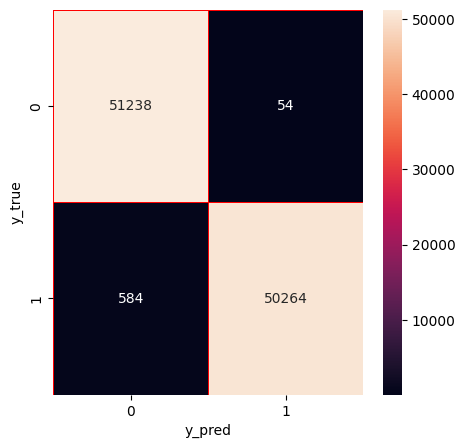

In [31]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()



In [32]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

# Random Forest Classifier

Accuracy of RF: 0.9940278049735657
Precision of RF: 0.9940709654292108
Recall of RF: 0.9940278049735657
F1-score of RF: 0.9940277962539119
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51292
           1       0.99      1.00      0.99     50848

    accuracy                           0.99    102140
   macro avg       0.99      0.99      0.99    102140
weighted avg       0.99      0.99      0.99    102140



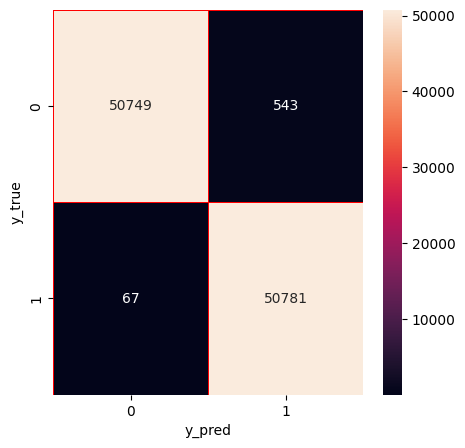

In [33]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [34]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

# xGB Classifier

Accuracy of XGBoost: 0.9991090659878598
Precision of XGBoost: 0.9991090993150433
Recall of XGBoost: 0.9991090659878598
F1-score of XGBoost: 0.9991090664663601
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51292
           1       1.00      1.00      1.00     50848

    accuracy                           1.00    102140
   macro avg       1.00      1.00      1.00    102140
weighted avg       1.00      1.00      1.00    102140



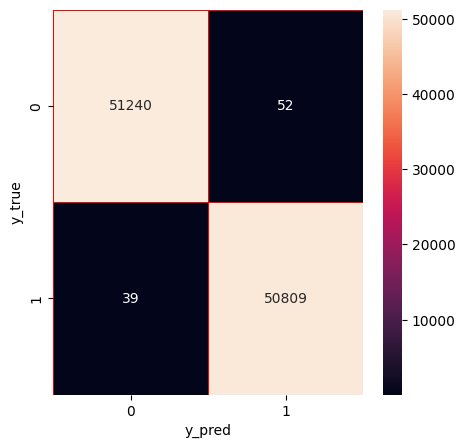

In [35]:
import xgboost as xgb
from xgboost import plot_importance
xg = xgb.XGBClassifier(n_estimators = 3)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()



In [36]:


xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)



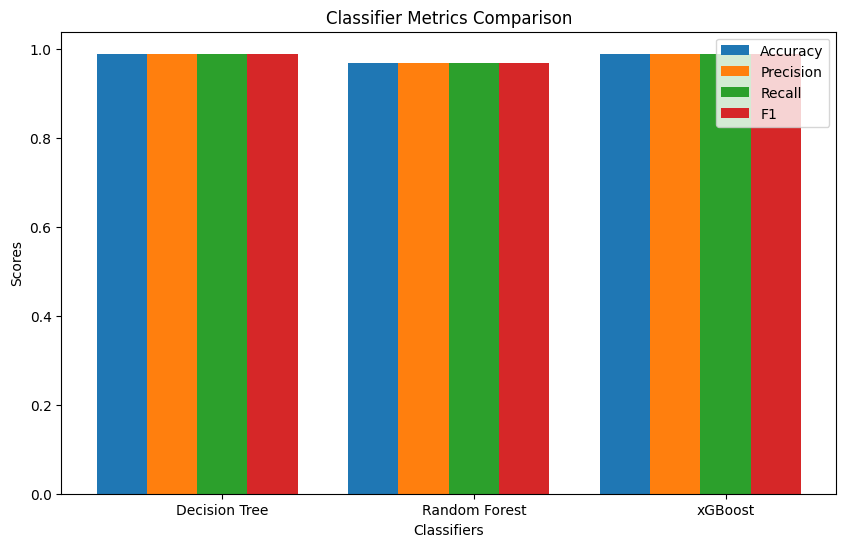

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# List of classifiers
classifiers = ['Decision Tree', 'Random Forest', 'xGBoost']

# Metrics for each classifier
accuracy = [0.99, 0.97, 0.99]
precision = [0.99, 0.97, 0.99]
recall = [0.99, 0.97, 0.99]
f1 = [0.99, 0.97, 0.99]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric for each classifier
bar_width = 0.2
index = np.arange(len(classifiers))

bar1 = ax.bar(index - bar_width, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index, precision, bar_width, label='Precision')
bar3 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(index + 2 * bar_width, f1, bar_width, label='F1')

# Set labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Classifier Metrics Comparison')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classifiers)
ax.legend()

# Show the plot
plt.show()

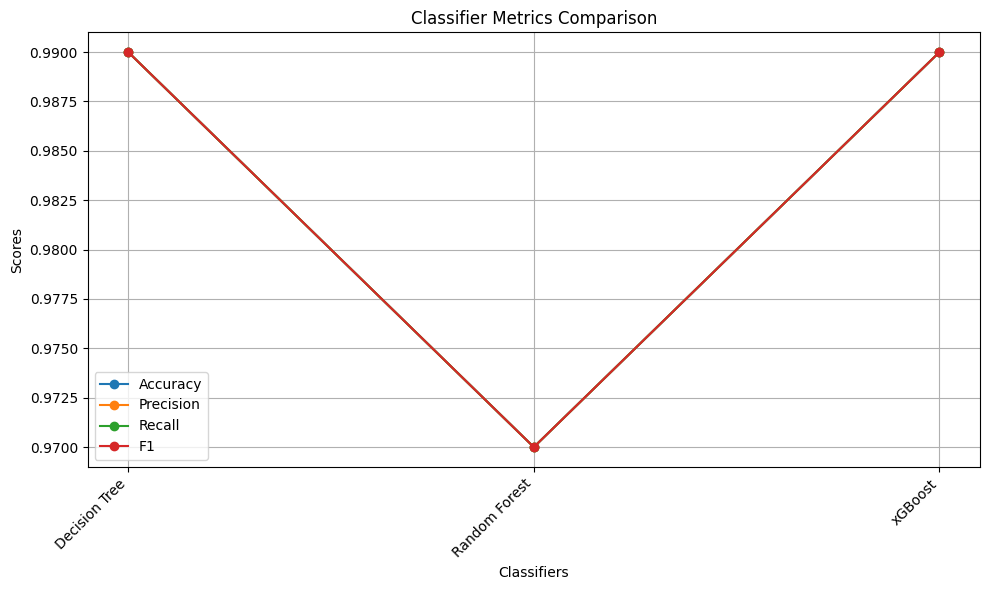

In [38]:
#Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines for each metric
ax.plot(classifiers, accuracy, marker='o', label='Accuracy')
ax.plot(classifiers, precision, marker='o', label='Precision')
ax.plot(classifiers, recall, marker='o', label='Recall')
ax.plot(classifiers, f1, marker='o', label='F1')

# Set labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Classifier Metrics Comparison')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()